In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier  

### Descriptive methods (Betimleme)
Veriyi açıklamak için kullanılabilecek yorumlanması kolay ilişki ve desenleri elde etmemizi sağlar.
1. Kümeleme - Clustering
2. Karar ağaçları - Decision trees
3. Birliktelik çözümlemesi

### Prediction methods (Tahmin yöntemleri)
Bir değişkenin bilinmeyen veya gelecek değerlerini başka diğer değişkenler kullanarak tahmin etmeyi sağlar.
1. Regresyon analizi (Regression analysis)
2. Sınıflandırma (Classification, decision tree, neural network)

### Machine Learning

#### Supervised Learning 
Elimdeki verilerin etiketlendiği durumlarda kullanılır. Elimizdeki verileri train test olarak ayrılarak model kurulur ve tahminleme yapılır.

#### Unsupervised Learning
Elimdeki verilerde etiket yoksa veri gruplandırma yapılır. Train, test olarak veri ayrılmaz.

### SEMMA
Sample: Veriden sample alınması        
Explore : Verinin incelenerek ön analiz edilmesi. Görselleştirme               
Modify : Verinin ön analizi sonucu ön işlenmesi sürecidir. Boş verilerin, outlierların atılması gibi. Veriler işlenmeden önce gruplandırma yapılması gibi.     
Model : Hedef değişkenle birlikte algoritmaların kurulması.        
Assess : Modelin değerlendirilmesi.       

# Decision Trees (Karar ağaçları) 
Veri setindeki sonuç değişkeni (response variables) ile ilgili en iyi kararı verebilmek için diğer bağımsız değişkenler için en iyi kuralları (kombinasyonları) oluşturur.

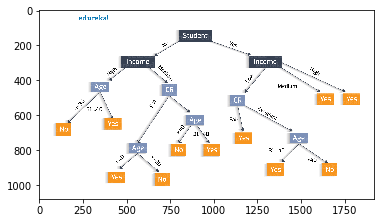

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('Resources\Decision-Tree.png')
imgplot = plt.imshow(img)

In [3]:
diabetes = pd.read_csv("Datasets/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [5]:
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 1 if x[2] <= 67.0 else 0) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[5] <= 28.149999618530273 else 0) if x[5] <=
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[1] <= 133.0 else (1 if x[2] <= 73.0 else 0) if x[1] <= 135.0 else
    0) if x[2] <= 94.0 else 1 if x[5] <= 12.0 else 0) if x[5] <= 
    26.949999809265137 

In [8]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6883116883116883

### Cross validation

In [9]:
# cart_model nesnesinin bilgilerini gösterir
?cart_model

In [10]:
# max_depth : kaç farklı dala bölüneceği parametresidir
# min_sample_split : bir dal bölünürken kaç farklı kategoriye bölüneceğinin parametresidir.
# verbose : verilen çıktının gösterim parametresidir
# n_jobs : işlemlerin paralel yapılması parametresidir. -1'de ise paralel işlemler yapılmasını sağlar. 1'de bütün işlem adımları gösterilir.
cart_grid = {"max_depth":range(1,10), "min_samples_split":list(range(2,50))}
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs =-1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)
# Veri setinde farklı parametrelerle 10 farklı run edilerek sonuçlar alınır.

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    9.8s finished
C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [11]:
print('En iyi parametreler : ' + str(cart_cv_model.best_params_))

En iyi parametreler : {'max_depth': 5, 'min_samples_split': 19}


In [12]:
# cross validation ile bulunan en iyi parametrelerle yeni bir model kurulması. Bu parametrelerle en iyi sonuç alınacaktır.
cart = DecisionTreeClassifier(max_depth = 5, min_samples_split=19)
cart_tuned = cart.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.67      0.57      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



# Random Forest Algorithm
Büyük veri seti arasından farklı ağaçlar kurarak ortak bir model kurar.
Çok fazla değişken varsa random forrest ile değişkenlerin sayısı azaltılmaya çalışılır.    
Randomforrest kayıp verilerle (boş değerlerle) başa çıkabilen bir algortimadır.
Bagging tekniği kullanılarak farklı alt örneklemler üzerinden modelleme yaparak model varyansını en aza indirir.
Sınıflandırma ve regresyon modellerinde kullanılabilir.
Sınıfların dengesiz olması durumunda kümelerdeki hataları en aza indirir.

Classifier durumunda sonuç belirlenirken voting yapar. Örn 90 farklı ağacın sonucu 1 10 taneninki 0 ise genel sonuç 1 olur.
Regression durumunda sonuç belirlenirken 100 farklı ağacın sonucunun ortalamasını alır. 

Veriler 1/3 test 2/3 train olarak kullanılabilir.

In [14]:
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model
# bootstrap : with replacement parametresi
# n_estimators : kaç tane tree kurulacağı parametresi
# max_features : kaç değişken kullanılacağını belirler, 'auto' kaç tane kullanılacağına model karar verilir.

C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7359307359307359

In [17]:
?rf_model

In [18]:
# farklı parametrelerle cross validation yaparak en iyi parametrelerin bulunması
rf_params = {"max_depth":[2,5,8,10],"max_features":[2,5,8],"n_estimators":[10,500,1000],"min_samples_split":[2,5,10]}
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose = 5)
rf_cv_model.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 324 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1044 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.1min finished
C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [19]:
print('En iyi parametreler : ' + str(rf_cv_model.best_params_))

En iyi parametreler : {'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [20]:
# en iyi parametreleri alarak yeni bir tahmin yapılması. Bu tahminle en iyi sonucu elde edeceğim.
rf_tuned = RandomForestClassifier(max_depth= 8, max_features = 8, min_samples_split = 2, n_estimators = 1000)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       151
           1       0.63      0.70      0.66        80

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.76       231



In [23]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, index = X_train.columns)
Importance

,Importance
Pregnancies,4.555740
Glucose,38.432387
BloodPressure,7.037161
SkinThickness,4.644182
Insulin,5.024886
BMI,16.504892
DiabetesPedigreeFunction,10.602544
Age,13.198208


Text(0.5, 0, 'Değişken Önem Düzeyleri')

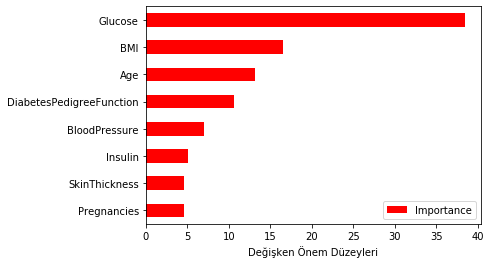

In [24]:
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Değişken Önem Düzeyleri')

#### Bootstrap

Random forest algoritmasında model kurulurken farklı sample lardan elde edilen tahminlerin regression için ortalama alınarak, classification için oylama yapılarak belirlenir.

## Gradient Boosting Machines

Boosting algoritmalarında farklı sample'lardan elde edilen sonuçların accuracy'leri kıyaslanarak yüksek accuracy'lerin elde edildiği veri setlerinin sonraki adımlarda seçilme eğilimini artırır. Bir başka deyişle verilere bir weight verir.

In [28]:
diabetes = pd.read_csv("Datasets/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
gbm_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [31]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [32]:
?gbm_model

In [38]:
gbm_params = {'learning_rate':[0.001, 0.01, 0.1, 0.05],'n_estimators':[100,500,1000],'max_depth':[3,5,10],'min_samples_split':[2,5,10]}

In [40]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=5)
gbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.8min finished
C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...None,
                                                  presort='auto

In [41]:
print('En iyi parametreler: '+str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [43]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, max_depth= 5, min_samples_split = 2, n_estimators = 500)
gbm_tuned = gbm.fit(X_train, y_train)

In [45]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       151
           1       0.61      0.68      0.64        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## XGBoost

In [64]:
diabetes = pd.read_csv("Datasets/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [65]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [66]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       151
           1       0.62      0.70      0.66        80

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.75       231



In [68]:
xgb_params = {'n_estimators':[100,500,1000],'subsample':[0.6,0.8,1.0],'max_depth':[3,4,5],'learning_rate':[0.001, 0.01, 0.1],'min_samples_split':[2,5,10]}
xgb = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2)
xgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s


KeyboardInterrupt: 

In [69]:
print('En iyi parametreler: '+str(xgb_cv_model.best_params_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [73]:
xgbm = XGBClassifier(learning_rate = 0.01, max_depth= 3, min_samples_split = 5, n_estimators = 500, subsample=1)
xgb_tuned = xgbm.fit(X_train, y_train)

In [74]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.65      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



## LightGBM

In [94]:
from lightgbm import LGBMClassifier

In [95]:
lgbm_model = LGBMClassifier().fit(X_train,y_train)

In [96]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7272727272727273

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       151
           1       0.60      0.66      0.63        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.74      0.73      0.73       231



In [98]:
?lgbm_model

In [99]:
lgbm_params = {'n_estimators':[100,500,1000],'subsample':[0.6,0.8,1.0],'max_depth':[3,4,5],'learning_rate':[0.01, 0.02, 0.05],'min_child_samples':[5,10]}


In [100]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2)
lgbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 517 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 1012 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 1589 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   57.9s finished
C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05],
                       

In [101]:
print('En iyi parametreler: '+str(lgbm_cv_model.best_params_))

En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_samples': 5, 'n_estimators': 100, 'subsample': 0.6}


In [102]:
lgbm = XGBClassifier(learning_rate = 0.05, max_depth= 3, min_child_samples = 5, n_estimators = 100, subsample=0.6)
lgbm_tuned = lgbm.fit(X_train, y_train)

In [103]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       151
           1       0.65      0.69      0.67        80

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.77      0.77       231



## CatBoost

En hızlı boost algoritmasıdır.

In [105]:
diabetes = pd.read_csv("Datasets/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [115]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier().fit(X_train, y_train)
cat_model

Learning rate set to 0.014051
0:	learn: 0.6855150	total: 25.5ms	remaining: 25.5s
1:	learn: 0.6770871	total: 47.3ms	remaining: 23.6s
2:	learn: 0.6702185	total: 68.3ms	remaining: 22.7s
3:	learn: 0.6643316	total: 90.4ms	remaining: 22.5s
4:	learn: 0.6579151	total: 112ms	remaining: 22.3s
5:	learn: 0.6514998	total: 133ms	remaining: 22s
6:	learn: 0.6461360	total: 154ms	remaining: 21.9s
7:	learn: 0.6390706	total: 175ms	remaining: 21.7s
8:	learn: 0.6327248	total: 198ms	remaining: 21.8s
9:	learn: 0.6271842	total: 222ms	remaining: 22s
10:	learn: 0.6216610	total: 247ms	remaining: 22.2s
11:	learn: 0.6156951	total: 272ms	remaining: 22.4s
12:	learn: 0.6103059	total: 294ms	remaining: 22.3s
13:	learn: 0.6050651	total: 317ms	remaining: 22.3s
14:	learn: 0.6011997	total: 338ms	remaining: 22.2s
15:	learn: 0.5965126	total: 359ms	remaining: 22.1s
16:	learn: 0.5905148	total: 380ms	remaining: 22s
17:	learn: 0.5860842	total: 402ms	remaining: 21.9s
18:	learn: 0.5826715	total: 425ms	remaining: 21.9s
19:	learn: 0.

163:	learn: 0.3795906	total: 3.81s	remaining: 19.4s
164:	learn: 0.3789064	total: 3.83s	remaining: 19.4s
165:	learn: 0.3785732	total: 3.85s	remaining: 19.3s
166:	learn: 0.3780658	total: 3.87s	remaining: 19.3s
167:	learn: 0.3775354	total: 3.89s	remaining: 19.3s
168:	learn: 0.3769631	total: 3.92s	remaining: 19.3s
169:	learn: 0.3765574	total: 3.94s	remaining: 19.2s
170:	learn: 0.3760174	total: 3.96s	remaining: 19.2s
171:	learn: 0.3756017	total: 3.98s	remaining: 19.2s
172:	learn: 0.3752173	total: 4s	remaining: 19.1s
173:	learn: 0.3748519	total: 4.03s	remaining: 19.1s
174:	learn: 0.3745657	total: 4.05s	remaining: 19.1s
175:	learn: 0.3743903	total: 4.07s	remaining: 19.1s
176:	learn: 0.3742445	total: 4.09s	remaining: 19s
177:	learn: 0.3739540	total: 4.12s	remaining: 19s
178:	learn: 0.3737146	total: 4.14s	remaining: 19s
179:	learn: 0.3734065	total: 4.16s	remaining: 19s
180:	learn: 0.3728762	total: 4.18s	remaining: 18.9s
181:	learn: 0.3726519	total: 4.21s	remaining: 18.9s
182:	learn: 0.3723137	t

329:	learn: 0.3268762	total: 7.45s	remaining: 15.1s
330:	learn: 0.3267984	total: 7.47s	remaining: 15.1s
331:	learn: 0.3263309	total: 7.5s	remaining: 15.1s
332:	learn: 0.3258272	total: 7.52s	remaining: 15.1s
333:	learn: 0.3255450	total: 7.54s	remaining: 15s
334:	learn: 0.3252281	total: 7.56s	remaining: 15s
335:	learn: 0.3249689	total: 7.58s	remaining: 15s
336:	learn: 0.3248598	total: 7.6s	remaining: 15s
337:	learn: 0.3246616	total: 7.62s	remaining: 14.9s
338:	learn: 0.3242783	total: 7.64s	remaining: 14.9s
339:	learn: 0.3240859	total: 7.67s	remaining: 14.9s
340:	learn: 0.3239646	total: 7.69s	remaining: 14.9s
341:	learn: 0.3238829	total: 7.71s	remaining: 14.8s
342:	learn: 0.3237879	total: 7.73s	remaining: 14.8s
343:	learn: 0.3236833	total: 7.75s	remaining: 14.8s
344:	learn: 0.3233391	total: 7.77s	remaining: 14.8s
345:	learn: 0.3230156	total: 7.79s	remaining: 14.7s
346:	learn: 0.3229553	total: 7.81s	remaining: 14.7s
347:	learn: 0.3228482	total: 7.83s	remaining: 14.7s
348:	learn: 0.3225904	

488:	learn: 0.2963613	total: 10.9s	remaining: 11.4s
489:	learn: 0.2959048	total: 10.9s	remaining: 11.3s
490:	learn: 0.2958932	total: 10.9s	remaining: 11.3s
491:	learn: 0.2955765	total: 10.9s	remaining: 11.3s
492:	learn: 0.2955186	total: 11s	remaining: 11.3s
493:	learn: 0.2952287	total: 11s	remaining: 11.2s
494:	learn: 0.2951508	total: 11s	remaining: 11.2s
495:	learn: 0.2950645	total: 11s	remaining: 11.2s
496:	learn: 0.2949887	total: 11s	remaining: 11.2s
497:	learn: 0.2948839	total: 11.1s	remaining: 11.2s
498:	learn: 0.2947899	total: 11.1s	remaining: 11.1s
499:	learn: 0.2945701	total: 11.1s	remaining: 11.1s
500:	learn: 0.2944518	total: 11.1s	remaining: 11.1s
501:	learn: 0.2942897	total: 11.1s	remaining: 11.1s
502:	learn: 0.2940118	total: 11.2s	remaining: 11s
503:	learn: 0.2939247	total: 11.2s	remaining: 11s
504:	learn: 0.2937529	total: 11.2s	remaining: 11s
505:	learn: 0.2937061	total: 11.2s	remaining: 11s
506:	learn: 0.2935669	total: 11.3s	remaining: 10.9s
507:	learn: 0.2935284	total: 1

648:	learn: 0.2684778	total: 14.4s	remaining: 7.78s
649:	learn: 0.2684496	total: 14.4s	remaining: 7.75s
650:	learn: 0.2683567	total: 14.4s	remaining: 7.73s
651:	learn: 0.2682188	total: 14.4s	remaining: 7.71s
652:	learn: 0.2681053	total: 14.5s	remaining: 7.69s
653:	learn: 0.2678716	total: 14.5s	remaining: 7.67s
654:	learn: 0.2675452	total: 14.5s	remaining: 7.64s
655:	learn: 0.2674454	total: 14.5s	remaining: 7.62s
656:	learn: 0.2671925	total: 14.6s	remaining: 7.6s
657:	learn: 0.2670267	total: 14.6s	remaining: 7.58s
658:	learn: 0.2666833	total: 14.6s	remaining: 7.55s
659:	learn: 0.2663511	total: 14.6s	remaining: 7.53s
660:	learn: 0.2662955	total: 14.6s	remaining: 7.51s
661:	learn: 0.2659147	total: 14.7s	remaining: 7.49s
662:	learn: 0.2658037	total: 14.7s	remaining: 7.46s
663:	learn: 0.2654921	total: 14.7s	remaining: 7.44s
664:	learn: 0.2654503	total: 14.7s	remaining: 7.42s
665:	learn: 0.2653269	total: 14.7s	remaining: 7.4s
666:	learn: 0.2648927	total: 14.8s	remaining: 7.38s
667:	learn: 0.

812:	learn: 0.2386604	total: 18s	remaining: 4.14s
813:	learn: 0.2385022	total: 18s	remaining: 4.12s
814:	learn: 0.2383943	total: 18.1s	remaining: 4.1s
815:	learn: 0.2382309	total: 18.1s	remaining: 4.08s
816:	learn: 0.2379940	total: 18.1s	remaining: 4.06s
817:	learn: 0.2378618	total: 18.1s	remaining: 4.03s
818:	learn: 0.2377779	total: 18.2s	remaining: 4.01s
819:	learn: 0.2377255	total: 18.2s	remaining: 3.99s
820:	learn: 0.2375875	total: 18.2s	remaining: 3.97s
821:	learn: 0.2375084	total: 18.2s	remaining: 3.94s
822:	learn: 0.2374343	total: 18.2s	remaining: 3.92s
823:	learn: 0.2371921	total: 18.3s	remaining: 3.9s
824:	learn: 0.2370326	total: 18.3s	remaining: 3.88s
825:	learn: 0.2369478	total: 18.3s	remaining: 3.85s
826:	learn: 0.2367990	total: 18.3s	remaining: 3.83s
827:	learn: 0.2364266	total: 18.3s	remaining: 3.81s
828:	learn: 0.2363404	total: 18.4s	remaining: 3.79s
829:	learn: 0.2360632	total: 18.4s	remaining: 3.77s
830:	learn: 0.2359506	total: 18.4s	remaining: 3.74s
831:	learn: 0.2356

971:	learn: 0.2151524	total: 21.5s	remaining: 618ms
972:	learn: 0.2150787	total: 21.5s	remaining: 596ms
973:	learn: 0.2150120	total: 21.5s	remaining: 574ms
974:	learn: 0.2145957	total: 21.5s	remaining: 552ms
975:	learn: 0.2145641	total: 21.6s	remaining: 530ms
976:	learn: 0.2143788	total: 21.6s	remaining: 508ms
977:	learn: 0.2142369	total: 21.6s	remaining: 486ms
978:	learn: 0.2141609	total: 21.6s	remaining: 464ms
979:	learn: 0.2140130	total: 21.6s	remaining: 442ms
980:	learn: 0.2139581	total: 21.7s	remaining: 420ms
981:	learn: 0.2137574	total: 21.7s	remaining: 398ms
982:	learn: 0.2136036	total: 21.7s	remaining: 375ms
983:	learn: 0.2135821	total: 21.7s	remaining: 353ms
984:	learn: 0.2133698	total: 21.8s	remaining: 331ms
985:	learn: 0.2131832	total: 21.8s	remaining: 309ms
986:	learn: 0.2128883	total: 21.8s	remaining: 287ms
987:	learn: 0.2128340	total: 21.8s	remaining: 265ms
988:	learn: 0.2126759	total: 21.8s	remaining: 243ms
989:	learn: 0.2125930	total: 21.9s	remaining: 221ms
990:	learn: 

In [116]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.65      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [110]:
catb_params = {'iterations':[200,500],'learning_rate':[0.01, 0.05, 0.1],'depth':[3,5,8]}
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5,n_jobs=-1,verbose=2)
catb_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  8.0min finished
C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0:	learn: 0.6867503	total: 29.4ms	remaining: 5.85s
1:	learn: 0.6805612	total: 53.2ms	remaining: 5.27s
2:	learn: 0.6753916	total: 76.9ms	remaining: 5.05s
3:	learn: 0.6699556	total: 101ms	remaining: 4.94s
4:	learn: 0.6641520	total: 124ms	remaining: 4.85s
5:	learn: 0.6586175	total: 148ms	remaining: 4.77s
6:	learn: 0.6536262	total: 173ms	remaining: 4.76s
7:	learn: 0.6474427	total: 201ms	remaining: 4.83s
8:	learn: 0.6415158	total: 225ms	remaining: 4.77s
9:	learn: 0.6358226	total: 254ms	remaining: 4.83s
10:	learn: 0.6307618	total: 279ms	remaining: 4.79s
11:	learn: 0.6258286	total: 302ms	remaining: 4.73s
12:	learn: 0.6210291	total: 326ms	remaining: 4.68s
13:	learn: 0.6166218	total: 344ms	remaining: 4.58s
14:	learn: 0.6119420	total: 368ms	remaining: 4.53s
15:	learn: 0.6069969	total: 391ms	remaining: 4.49s
16:	learn: 0.6016619	total: 414ms	remaining: 4.46s
17:	learn: 0.5975207	total: 441ms	remaining: 4.46s
18:	learn: 0.5924938	total: 464ms	remaining: 4.42s
19:	learn: 0.5887051	total: 488ms	rema

168:	learn: 0.3192548	total: 4.07s	remaining: 747ms
169:	learn: 0.3187628	total: 4.1s	remaining: 724ms
170:	learn: 0.3179833	total: 4.12s	remaining: 699ms
171:	learn: 0.3173188	total: 4.15s	remaining: 675ms
172:	learn: 0.3165607	total: 4.17s	remaining: 651ms
173:	learn: 0.3161535	total: 4.19s	remaining: 627ms
174:	learn: 0.3152966	total: 4.22s	remaining: 603ms
175:	learn: 0.3142933	total: 4.24s	remaining: 579ms
176:	learn: 0.3136651	total: 4.27s	remaining: 555ms
177:	learn: 0.3127728	total: 4.29s	remaining: 531ms
178:	learn: 0.3123241	total: 4.32s	remaining: 506ms
179:	learn: 0.3117052	total: 4.34s	remaining: 482ms
180:	learn: 0.3111637	total: 4.36s	remaining: 458ms
181:	learn: 0.3103466	total: 4.38s	remaining: 434ms
182:	learn: 0.3097009	total: 4.41s	remaining: 410ms
183:	learn: 0.3088433	total: 4.43s	remaining: 385ms
184:	learn: 0.3083510	total: 4.46s	remaining: 361ms
185:	learn: 0.3077302	total: 4.48s	remaining: 337ms
186:	learn: 0.3068446	total: 4.5s	remaining: 313ms
187:	learn: 0.

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EC5411CB38>,
             iid='warn', n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [111]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [112]:
catb = XGBClassifier(learning_rate = 0.01, depth= 8, iterations = 200)
catb_tuned = catb.fit(X_train, y_train)

In [113]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231

